In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv('data/training.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

In [4]:
data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


In [5]:
np.unique(data['class'])

array(['d ', 'h ', 'o ', 's '], dtype=object)

Temos 4 tipos de dados, vamos convertelos para numeros interios:
- 0 -> 'd'
- 1 -> 'h'
- 2 -> 'o'
- 3 -> 's'

In [6]:
dataLabel = data['class'].to_numpy()
dataLabel[dataLabel == 'd '] = 0
dataLabel[dataLabel == 'h '] = 1
dataLabel[dataLabel == 'o '] = 2
dataLabel[dataLabel == 's '] = 3
print(dataLabel)

[0 1 3 3 0 1 3 0 3 2 0 2 2 0 3 2 2 0 3 1 2 0 3 1 0 1 2 0 0 0 0 3 2 3 0 0 0
 1 2 0 0 0 3 3 1 0 0 2 0 3 0 3 3 1 1 3 2 0 1 1 0 2 2 2 1 3 1 0 0 1 2 2 2 3
 1 3 0 2 3 3 0 0 2 1 2 1 0 0 3 2 2 1 2 2 0 3 2 1 2 3 0 2 1 1 1 1 1 0 3 1 0
 0 0 0 1 2 3 1 3 3 3 3 2 3 1 3 1 3 1 0 3 3 2 3 1 3 2 3 0 3 3 1 3 1 3 0 0 3
 1 0 3 1 3 0 2 0 3 2 0 3 2 0 2 3 0 1 3 3 2 0 3 1 1 1 3 3 1 0 1 0 3 3 1 3 1
 3 0 2 1 3 3 3 1 0 0 1 1 1]


## Rearranjando o DF

In [7]:
data['class'].dtype

dtype('O')

In [8]:
data = data.drop('class', axis=1)
data['class'] = dataLabel
data['class'] = pd.to_numeric(data['class'])
data['class'].dtype

dtype('int64')

## Analisando Correlacao dos dados

<IPython.core.display.Javascript object>


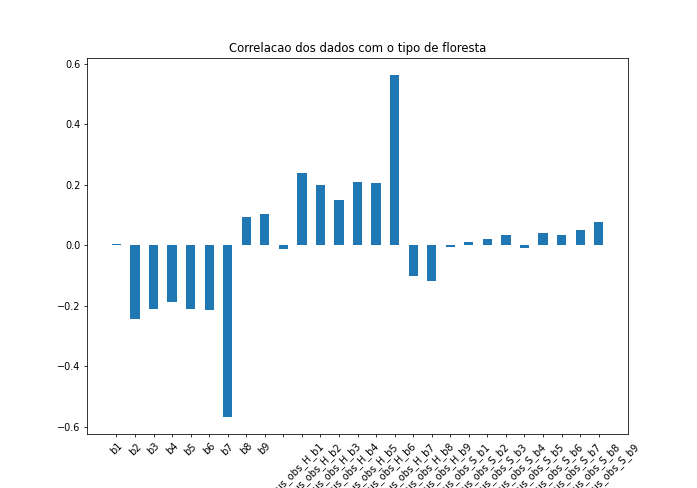

In [9]:
plt.figure(figsize = (10,7))
labels = data.keys()[:-1]
weight = data.corr()['class'].to_numpy()[:-1]
plt.bar( labels, weight, width= 0.5);
plt.title('Correlacao dos dados com o tipo de floresta')
plt.xticks(rotation=45);

In [10]:
weight.sort()
aux = weight > 0
positiveLabels = labels[aux]
negativeLabels = labels[aux == False]
positiveWeight = weight[weight > 0]
negativeWeight = weight[weight < 0]

## Correlação Positiva

<IPython.core.display.Javascript object>


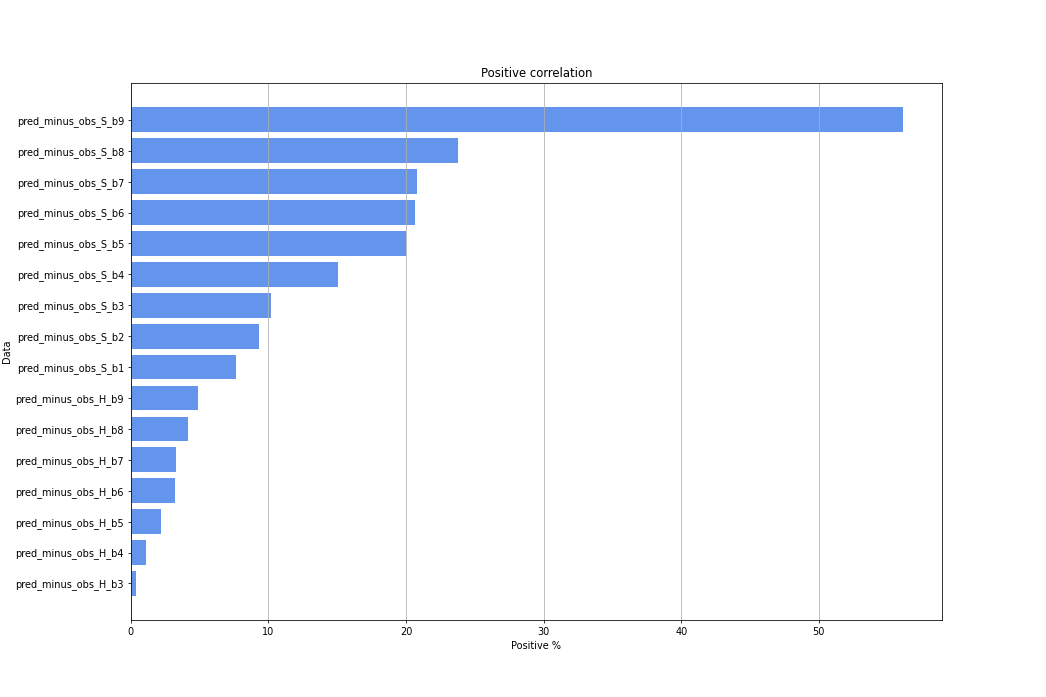

In [11]:
plt.figure(figsize = (15,10));

plt.grid(axis='x');
plt.barh(positiveLabels, positiveWeight*100, color='#6495ED');
plt.title('Positive correlation');
plt.xlabel('Positive %');
plt.ylabel('Data');

## Correlação negativa

<IPython.core.display.Javascript object>


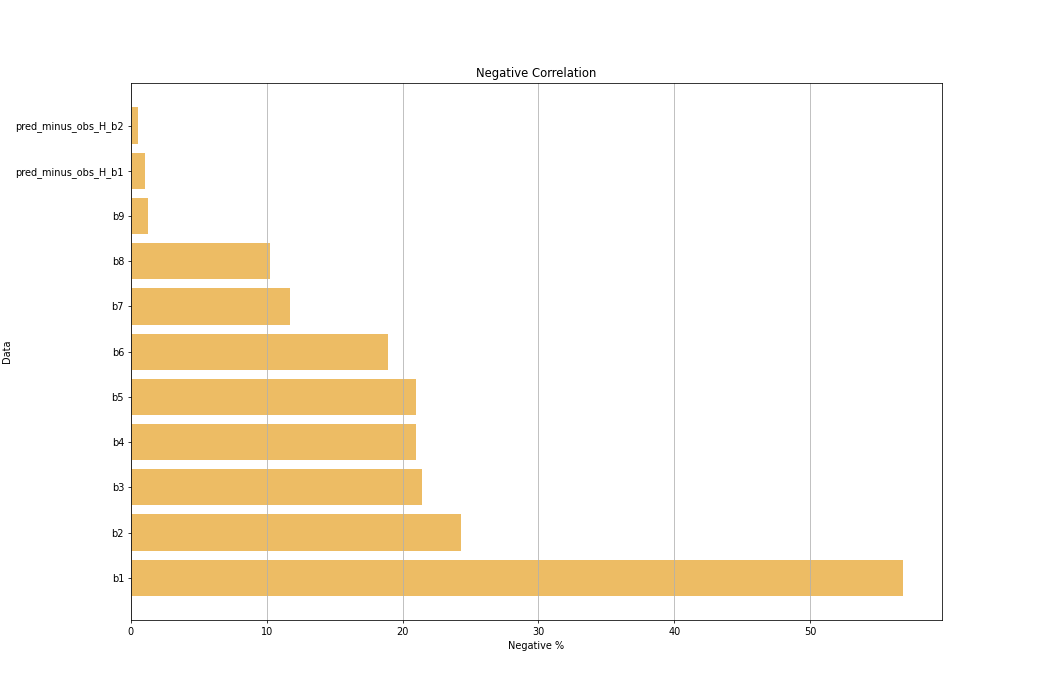

In [12]:
plt.figure(figsize = (15,10));
plt.grid(axis='x');
plt.barh(negativeLabels, negativeWeight*-100, color='#edbc64');
plt.title('Negative Correlation')
plt.xlabel('Negative %');
plt.ylabel('Data');


# Geral correlation
how much each data influences the differentiation between forest 

<IPython.core.display.Javascript object>


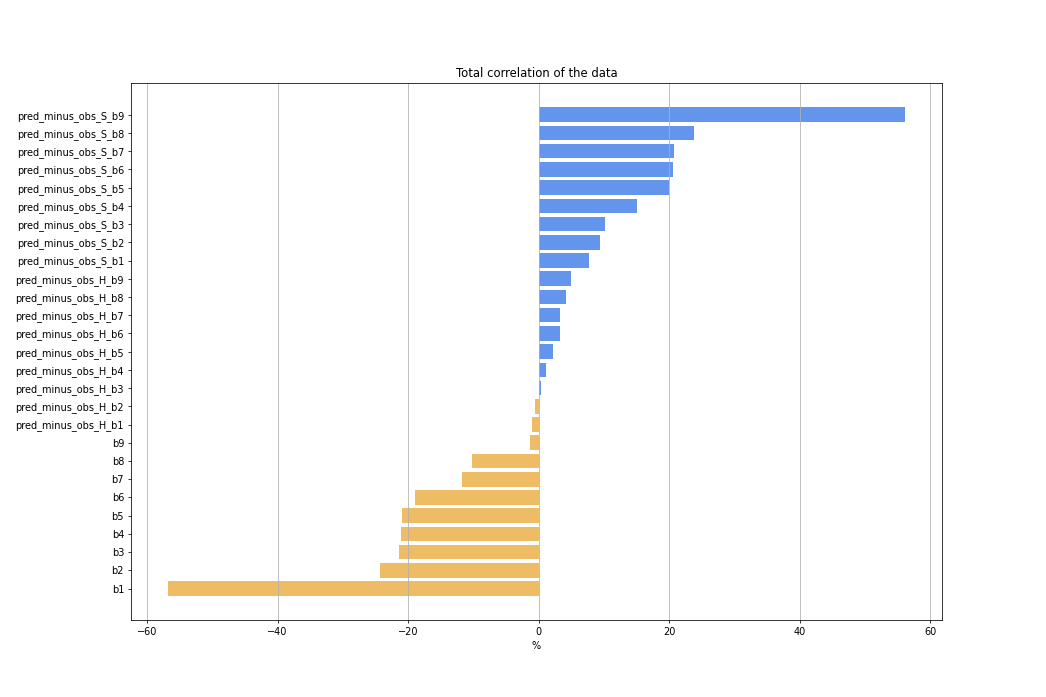

In [13]:
plt.figure(figsize = (15,10));
plt.barh(negativeLabels, negativeWeight*100, color='#edbc64');
plt.barh(positiveLabels, positiveWeight*100, color='#6495ED');
plt.grid(axis='x');
plt.xlabel('%');
plt.title('Total correlation of the data');

del (weight,
positiveLabels,
negativeLabels,
positiveWeight,
negativeWeight)

# Data preprossing

In [14]:
dataLabel      = data['class'].to_numpy();
dataParameters = data.drop('class', axis=1).to_numpy();

Temos 4 tipos de dados, vamos convertelos para numeros interios:
- [1 0 0 0] -> 'd'
- [0 1 0 0] -> 'h'
- [0 0 1 0] -> 'o'
- [0 0 0 1] -> 's'

In [15]:
dataLabel = tf.keras.utils.to_categorical(dataLabel, 4)

In [26]:
from sklearn.model_selection import train_test_split

dataParametersTrain, datParametersTest, dataLabelTrain ,dataLabelTest = train_test_split(dataParameters,
                                                                                      dataLabel,
                                                                                      test_size=0.05,
                                                                                      random_state=5)

nEpochs      = 500
percentSplit = 0.05

In [17]:
data.shape

(198, 28)

## let's modeling 

In [28]:
modelo = tf.keras.models.Sequential()

modelo.add( tf.keras.layers.Dense( units = 100, activation = 'tanh', input_shape = (27,) ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 100, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 100, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 50, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))

modelo.add(tf.keras.layers.Dense( units = 4  , activation = 'softmax' ))

modelo.compile(optimizer = 'Adamax' ,
               loss='CategoricalCrossentropy',
               metrics=['accuracy'])

hist = modelo.fit(dataParametersTrain,
                  dataLabelTrain,
                  epochs = nEpochs,
                  batch_size = 35,
                  validation_split = percentSplit,
                  verbose =1)


Epoch 1/500
9/9 [==============================] - 4s 154ms/step - loss: 1.3802 - accuracy: 0.3433 - val_loss: 1.1012 - val_accuracy: 0.6250
Epoch 2/500
9/9 [==============================] - 0s 54ms/step - loss: 1.1282 - accuracy: 0.5147 - val_loss: 0.9854 - val_accuracy: 0.7500
Epoch 3/500
9/9 [==============================] - 0s 48ms/step - loss: 1.0813 - accuracy: 0.5237 - val_loss: 0.9611 - val_accuracy: 0.7500
Epoch 4/500
9/9 [==============================] - 0s 53ms/step - loss: 1.0214 - accuracy: 0.6114 - val_loss: 0.9441 - val_accuracy: 0.7500
Epoch 5/500
9/9 [==============================] - 0s 54ms/step - loss: 0.9033 - accuracy: 0.6481 - val_loss: 0.9263 - val_accuracy: 0.8125
Epoch 6/500
9/9 [==============================] - 0s 48ms/step - loss: 0.8664 - accuracy: 0.6450 - val_loss: 0.9025 - val_accuracy: 0.7500
Epoch 7/500
9/9 [==============================] - 0s 50ms/step - loss: 0.8140 - accuracy: 0.6960 - val_loss: 0.9226 - val_accuracy: 0.7500
Epoch 8/500
9/9 [==

9/9 [==============================] - 0s 57ms/step - loss: 0.5041 - accuracy: 0.8248 - val_loss: 1.0108 - val_accuracy: 0.7500
Epoch 60/500
9/9 [==============================] - 0s 56ms/step - loss: 0.4864 - accuracy: 0.8175 - val_loss: 1.0337 - val_accuracy: 0.7500
Epoch 61/500
9/9 [==============================] - 1s 61ms/step - loss: 0.4292 - accuracy: 0.8588 - val_loss: 1.0136 - val_accuracy: 0.7500
Epoch 62/500
9/9 [==============================] - 1s 64ms/step - loss: 0.4795 - accuracy: 0.8351 - val_loss: 1.0335 - val_accuracy: 0.6875
Epoch 63/500
9/9 [==============================] - 1s 64ms/step - loss: 0.4118 - accuracy: 0.8686 - val_loss: 1.0394 - val_accuracy: 0.6875
Epoch 64/500
9/9 [==============================] - 0s 58ms/step - loss: 0.4553 - accuracy: 0.8550 - val_loss: 1.0371 - val_accuracy: 0.7500
Epoch 65/500
9/9 [==============================] - 0s 52ms/step - loss: 0.4834 - accuracy: 0.8438 - val_loss: 1.0044 - val_accuracy: 0.7500
Epoch 66/500
9/9 [========

9/9 [==============================] - 0s 55ms/step - loss: 0.3488 - accuracy: 0.8929 - val_loss: 1.1131 - val_accuracy: 0.7500
Epoch 118/500
9/9 [==============================] - 0s 50ms/step - loss: 0.3669 - accuracy: 0.8861 - val_loss: 1.0878 - val_accuracy: 0.7500
Epoch 119/500
9/9 [==============================] - 0s 53ms/step - loss: 0.3358 - accuracy: 0.8842 - val_loss: 1.0424 - val_accuracy: 0.8125
Epoch 120/500
9/9 [==============================] - 0s 45ms/step - loss: 0.3543 - accuracy: 0.8757 - val_loss: 1.0640 - val_accuracy: 0.6875
Epoch 121/500
9/9 [==============================] - 0s 52ms/step - loss: 0.3609 - accuracy: 0.8962 - val_loss: 1.0188 - val_accuracy: 0.8125
Epoch 122/500
9/9 [==============================] - 0s 51ms/step - loss: 0.3170 - accuracy: 0.8747 - val_loss: 1.0111 - val_accuracy: 0.8125
Epoch 123/500
9/9 [==============================] - 0s 60ms/step - loss: 0.3879 - accuracy: 0.8769 - val_loss: 1.0391 - val_accuracy: 0.8125
Epoch 124/500
9/9 [=

Epoch 175/500
9/9 [==============================] - 0s 52ms/step - loss: 0.3897 - accuracy: 0.8935 - val_loss: 1.1233 - val_accuracy: 0.8125
Epoch 176/500
9/9 [==============================] - 0s 52ms/step - loss: 0.3133 - accuracy: 0.8793 - val_loss: 1.2112 - val_accuracy: 0.6875
Epoch 177/500
9/9 [==============================] - 0s 60ms/step - loss: 0.3619 - accuracy: 0.8737 - val_loss: 1.2012 - val_accuracy: 0.6875
Epoch 178/500
9/9 [==============================] - 0s 46ms/step - loss: 0.3505 - accuracy: 0.8889 - val_loss: 1.1003 - val_accuracy: 0.6875
Epoch 179/500
9/9 [==============================] - 0s 54ms/step - loss: 0.2930 - accuracy: 0.9039 - val_loss: 1.0765 - val_accuracy: 0.6875
Epoch 180/500
9/9 [==============================] - 0s 47ms/step - loss: 0.3187 - accuracy: 0.8827 - val_loss: 1.0363 - val_accuracy: 0.6875
Epoch 181/500
9/9 [==============================] - 1s 65ms/step - loss: 0.2426 - accuracy: 0.9115 - val_loss: 1.0483 - val_accuracy: 0.6875
Epoch 

Epoch 233/500
9/9 [==============================] - 0s 51ms/step - loss: 0.2303 - accuracy: 0.9240 - val_loss: 0.9979 - val_accuracy: 0.8125
Epoch 234/500
9/9 [==============================] - 0s 45ms/step - loss: 0.3146 - accuracy: 0.9073 - val_loss: 1.1090 - val_accuracy: 0.7500
Epoch 235/500
9/9 [==============================] - 1s 62ms/step - loss: 0.2867 - accuracy: 0.9099 - val_loss: 1.1426 - val_accuracy: 0.7500
Epoch 236/500
9/9 [==============================] - 0s 48ms/step - loss: 0.2817 - accuracy: 0.8721 - val_loss: 1.1593 - val_accuracy: 0.6875
Epoch 237/500
9/9 [==============================] - 0s 49ms/step - loss: 0.2725 - accuracy: 0.9094 - val_loss: 1.1339 - val_accuracy: 0.6875
Epoch 238/500
9/9 [==============================] - 0s 55ms/step - loss: 0.2680 - accuracy: 0.9082 - val_loss: 1.0556 - val_accuracy: 0.7500
Epoch 239/500
9/9 [==============================] - 0s 53ms/step - loss: 0.2534 - accuracy: 0.9030 - val_loss: 1.0740 - val_accuracy: 0.7500
Epoch 

Epoch 291/500
9/9 [==============================] - 1s 64ms/step - loss: 0.2713 - accuracy: 0.9032 - val_loss: 1.0303 - val_accuracy: 0.6875
Epoch 292/500
9/9 [==============================] - 0s 55ms/step - loss: 0.2588 - accuracy: 0.9090 - val_loss: 1.0258 - val_accuracy: 0.8125
Epoch 293/500
9/9 [==============================] - 0s 50ms/step - loss: 0.2505 - accuracy: 0.9135 - val_loss: 1.0314 - val_accuracy: 0.8125
Epoch 294/500
9/9 [==============================] - 0s 58ms/step - loss: 0.2739 - accuracy: 0.9192 - val_loss: 1.0628 - val_accuracy: 0.7500
Epoch 295/500
9/9 [==============================] - 1s 59ms/step - loss: 0.2252 - accuracy: 0.9317 - val_loss: 1.0591 - val_accuracy: 0.7500
Epoch 296/500
9/9 [==============================] - 0s 36ms/step - loss: 0.2756 - accuracy: 0.8961 - val_loss: 1.0169 - val_accuracy: 0.8125
Epoch 297/500
9/9 [==============================] - 0s 50ms/step - loss: 0.2518 - accuracy: 0.9257 - val_loss: 1.0219 - val_accuracy: 0.8125
Epoch 

Epoch 349/500
9/9 [==============================] - 1s 62ms/step - loss: 0.2579 - accuracy: 0.9081 - val_loss: 1.0040 - val_accuracy: 0.8125
Epoch 350/500
9/9 [==============================] - 0s 51ms/step - loss: 0.2026 - accuracy: 0.9420 - val_loss: 1.0339 - val_accuracy: 0.8125
Epoch 351/500
9/9 [==============================] - 0s 48ms/step - loss: 0.2380 - accuracy: 0.9310 - val_loss: 1.0314 - val_accuracy: 0.7500
Epoch 352/500
9/9 [==============================] - 0s 57ms/step - loss: 0.2180 - accuracy: 0.9260 - val_loss: 1.0731 - val_accuracy: 0.6875
Epoch 353/500
9/9 [==============================] - 0s 44ms/step - loss: 0.2775 - accuracy: 0.8956 - val_loss: 1.0216 - val_accuracy: 0.7500
Epoch 354/500
9/9 [==============================] - 0s 46ms/step - loss: 0.2184 - accuracy: 0.9338 - val_loss: 1.0091 - val_accuracy: 0.7500
Epoch 355/500
9/9 [==============================] - 0s 58ms/step - loss: 0.2656 - accuracy: 0.9003 - val_loss: 1.0737 - val_accuracy: 0.7500
Epoch 

Epoch 407/500
9/9 [==============================] - 1s 59ms/step - loss: 0.2060 - accuracy: 0.9368 - val_loss: 1.0037 - val_accuracy: 0.8125
Epoch 408/500
9/9 [==============================] - 0s 44ms/step - loss: 0.2447 - accuracy: 0.9251 - val_loss: 0.9966 - val_accuracy: 0.8125
Epoch 409/500
9/9 [==============================] - 0s 57ms/step - loss: 0.3081 - accuracy: 0.8939 - val_loss: 0.9929 - val_accuracy: 0.8125
Epoch 410/500
9/9 [==============================] - 0s 50ms/step - loss: 0.2321 - accuracy: 0.9466 - val_loss: 1.0049 - val_accuracy: 0.8125
Epoch 411/500
9/9 [==============================] - 0s 50ms/step - loss: 0.2824 - accuracy: 0.9097 - val_loss: 0.9879 - val_accuracy: 0.8125
Epoch 412/500
9/9 [==============================] - 0s 46ms/step - loss: 0.1982 - accuracy: 0.9420 - val_loss: 1.0046 - val_accuracy: 0.8125
Epoch 413/500
9/9 [==============================] - 0s 56ms/step - loss: 0.2822 - accuracy: 0.9011 - val_loss: 1.0144 - val_accuracy: 0.8125
Epoch 

Epoch 465/500
9/9 [==============================] - 0s 56ms/step - loss: 0.1937 - accuracy: 0.9391 - val_loss: 1.0132 - val_accuracy: 0.8125
Epoch 466/500
9/9 [==============================] - 0s 40ms/step - loss: 0.2323 - accuracy: 0.9279 - val_loss: 1.0191 - val_accuracy: 0.7500
Epoch 467/500
9/9 [==============================] - 0s 43ms/step - loss: 0.2680 - accuracy: 0.9037 - val_loss: 1.0204 - val_accuracy: 0.7500
Epoch 468/500
9/9 [==============================] - 0s 53ms/step - loss: 0.2587 - accuracy: 0.9218 - val_loss: 1.0310 - val_accuracy: 0.7500
Epoch 469/500
9/9 [==============================] - 0s 42ms/step - loss: 0.2526 - accuracy: 0.9150 - val_loss: 1.0252 - val_accuracy: 0.7500
Epoch 470/500
9/9 [==============================] - 1s 61ms/step - loss: 0.1986 - accuracy: 0.9462 - val_loss: 1.0248 - val_accuracy: 0.8125
Epoch 471/500
9/9 [==============================] - 0s 52ms/step - loss: 0.1704 - accuracy: 0.9432 - val_loss: 1.0185 - val_accuracy: 0.8125
Epoch 

<IPython.core.display.Javascript object>


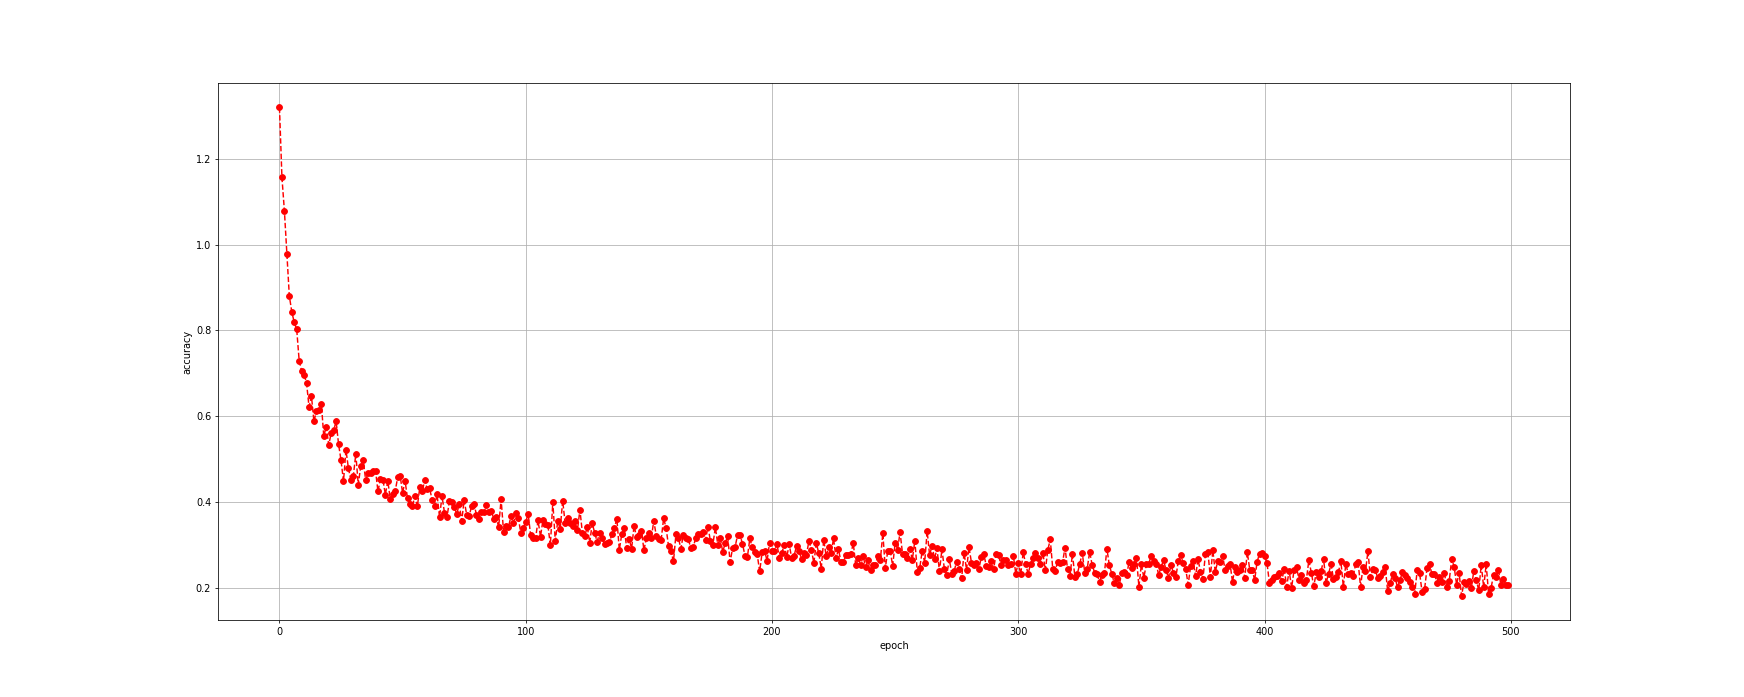

In [29]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['loss'], 'o', color='red')
plt.plot(hist.history['loss'], '--', color='red')
plt.grid()

<IPython.core.display.Javascript object>


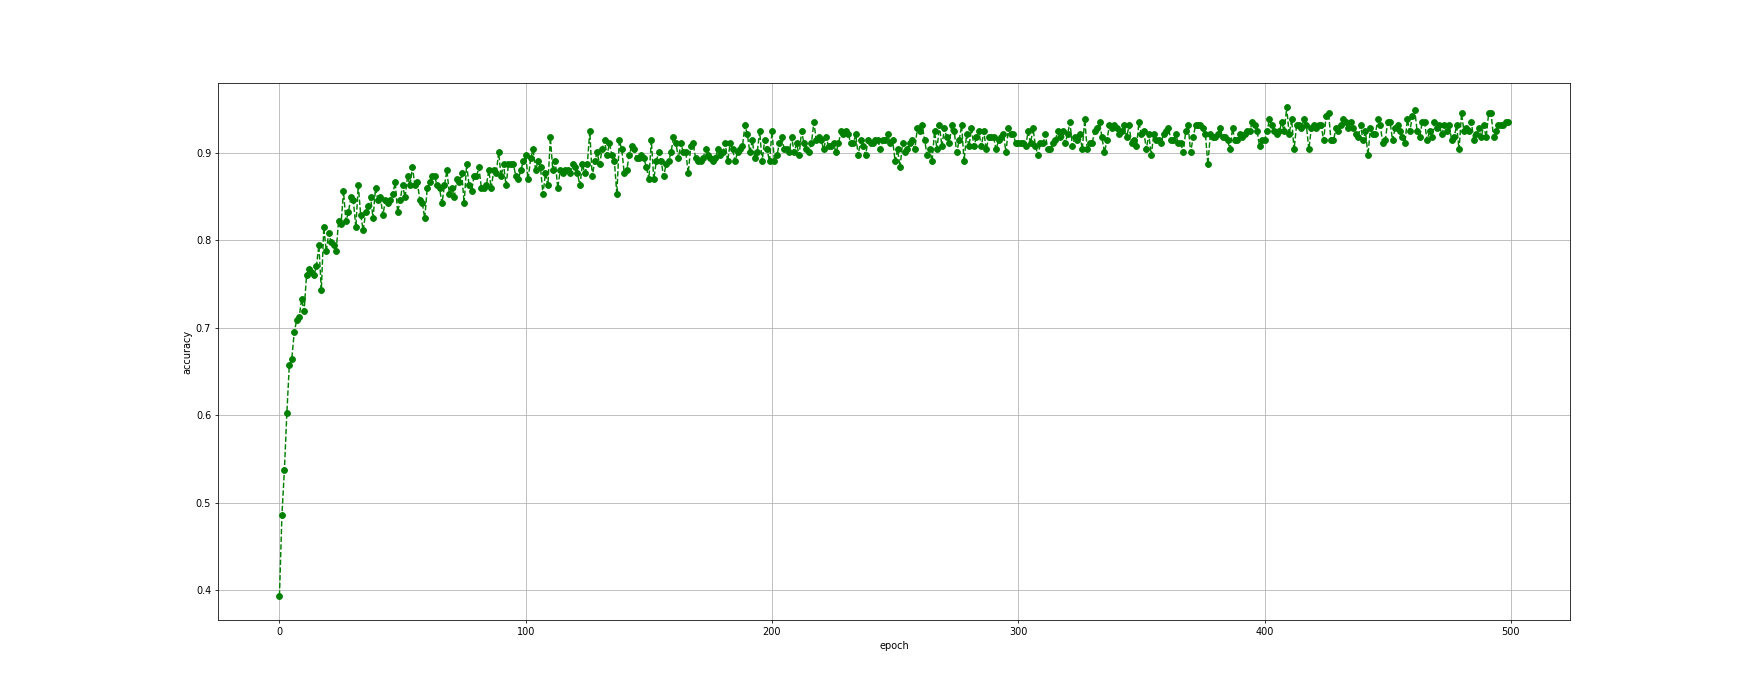

In [30]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], 'o', color='green')
plt.plot(hist.history['accuracy'], '--', color='green')
plt.grid()

In [31]:
from sklearn.metrics import r2_score
prediction =  modelo.predict(datParametersTest)
filtredPrediction=[]
p = np.around(prediction, decimals=0)
print('{:25}:{:.2f}'.format('Predictions R2', r2_score(prediction,dataLabelTest)))
print('{:25}:{:.2f}'.format('Rounded predictions R2', r2_score(p,dataLabelTest)))

Predictions R2           :0.31
Rounded predictions R2   :0.32


# Validando

In [32]:
data = pd.read_csv('data/testing.csv')

In [33]:
dataLabel = data['class']
dataLabel = data['class'].to_numpy()
dataLabel[dataLabel == 'd '] = 0
dataLabel[dataLabel == 'h '] = 1
dataLabel[dataLabel == 'o '] = 2
dataLabel[dataLabel == 's '] = 3

In [34]:
data = data.drop('class', axis=1)
data['class'] = dataLabel
data['class'] = pd.to_numeric(data['class'])

In [35]:
dataLabel      = data['class'].to_numpy()
dataLabel = tf.keras.utils.to_categorical(dataLabel, 4)

dataParameters = data.drop('class', axis=1).to_numpy()
prediction =  modelo.predict(dataParameters)
filtredPrediction = []
p = np.around(prediction, decimals=0)
print('{:25}:{:.2f}'.format('Predictions R2', r2_score(prediction, dataLabel)))
print('{:25}:{:.2f}'.format('Rounded predictions R2', r2_score(p, dataLabel)))

Predictions R2           :0.80
Rounded predictions R2   :0.77
